In [4]:
import scanpy as sc
import pandas as pd
import numpy as np
import gc
import os

In [5]:
# Set the working directory
working_dir = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SET/GSE212252"
os.chdir(working_dir)
print(f"Current working directory: {os.getcwd()}")

Current working directory: /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SET/GSE212252


In [6]:
# Load the datasets
embryo_cre_neg = sc.read_h5ad("./output/processed_embryo_cre_negative_data.h5ad")
embryo_cre_pos = sc.read_h5ad("./output/processed_embryo_cre_positive_data.h5ad")
postnatal_cre_neg = sc.read_h5ad("./output/processed_post_natal_cre_negative_data.h5ad")
postnatal_cre_pos = sc.read_h5ad("./output/processed_post_natal_cre_positive_data.h5ad")
gc.collect()

# Add metadata to distinguish the datasets
embryo_cre_neg.obs['dataset'] = 'embryo_cre_negative'
embryo_cre_pos.obs['dataset'] = 'embryo_cre_positive'
postnatal_cre_neg.obs['dataset'] = 'postnatal_cre_negative'
postnatal_cre_pos.obs['dataset'] = 'postnatal_cre_positive'

In [7]:
# Combine all datasets
combined_data = sc.concat(
    [embryo_cre_neg, embryo_cre_pos, postnatal_cre_neg, postnatal_cre_pos],
    axis=0,
    join='outer',
    label='dataset',
    keys=['embryo_cre_negative', 'embryo_cre_positive', 'postnatal_cre_negative', 'postnatal_cre_positive'],
    index_unique='-'
)
gc.collect()

0

In [8]:
combined_data

AnnData object with n_obs × n_vars = 170389 × 25003
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'dataset'
    obsm: 'X_pca', 'X_umap'

In [9]:
print(f"Combined dataset shape: {combined_data.shape}")
print(f"Number of cells from each dataset:\n{combined_data.obs['dataset'].value_counts()}")

# Basic preprocessing of the combined dataset
sc.pp.filter_cells(combined_data, min_genes=200)
sc.pp.filter_genes(combined_data, min_cells=3)

print(f"Shape after filtering: {combined_data.shape}")

# Save the combined dataset
combined_data.write_h5ad("./output/combined_scRNA_data.h5ad")
print("Combined dataset saved as 'combined_scRNA_data.h5ad'")


Combined dataset shape: (170389, 25003)
Number of cells from each dataset:
dataset
embryo_cre_negative       57911
postnatal_cre_negative    57754
postnatal_cre_positive    30308
embryo_cre_positive       24416
Name: count, dtype: int64
Shape after filtering: (170375, 24440)
Combined dataset saved as 'combined_scRNA_data.h5ad'


In [11]:
# Perform UMAP
# Skip normalization and log transformation as data is already processed
sc.pp.highly_variable_genes(combined_data, n_top_genes=2000)
sc.pp.pca(combined_data, n_comps=50)
sc.pp.neighbors(combined_data, n_neighbors=15, n_pcs=50)
sc.tl.umap(combined_data)

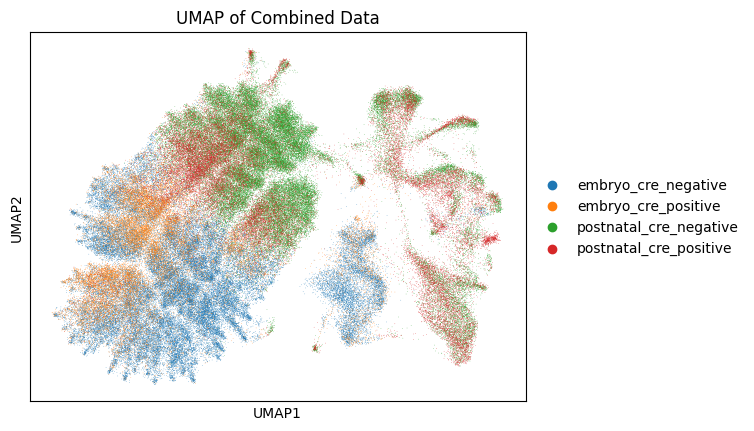

In [12]:
# Plot UMAP colored by dataset
sc.pl.umap(combined_data, color='dataset', title='UMAP of Combined Data')